In [144]:
"""
Briar Doty
AMATH 584 - HW6
12/7/20
Full repository available at https://github.com/briardoty/amath584/tree/main/hw6
"""

%matplotlib inline

import numpy as np
import numpy.ma as ma
from keras.datasets import mnist
from sklearn import linear_model, preprocessing, metrics
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mnist_util import *

In [2]:
# 1a - load dataset and transform to desired form
"""
Loading MNIST through Keras is easy. We can then transform the
data into the form described, AX = B, where A is the data matrix
of vectorized images, B is the binarized matrix of class labels,
and X represents our model mapping from image space to label space.
"""

# load mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# build data matrices
m, x, y = train_X.shape
train_A = np.reshape(train_X, (m,x*y))
train_A = train_A

m, x, y = test_X.shape
test_A = np.reshape(test_X, (m,x*y))
test_A = test_A

# build output matrices
lb = preprocessing.LabelBinarizer()
lb.fit(train_y)
train_B = lb.transform(train_y)

lb = preprocessing.LabelBinarizer()
lb.fit(test_y)
test_B = lb.transform(test_y)

# dict to store error from different models
err_dict = dict()

In [3]:
# 1b - solve Ax = b with Lasso
"""
"""

# solve with lasso
model_name = "Lasso alpha=0.1"
reg = linear_model.Lasso(alpha=0.1)
reg.fit(train_A, train_B)
X = reg.coef_.T

# look at results
train_pred = train_A @ X
train_err = metrics.mean_squared_error(train_B, train_pred)
print(f"{model_name} training error: {train_err}")

test_pred = test_A @ X
test_err = metrics.mean_squared_error(test_B, test_pred)
print(f"{model_name} test set error: {test_err}")

err_dict[model_name] = {
    "train_err": train_err,
    "test_err": test_err,
    "X": np.array(X)
}

Lasso training error: 0.058033726762576156
Lasso test set error: 0.05791847646055155


In [4]:
# 1c - solve Ax = b with pseudo-inverse
"""
"""

# dict to store error from different models
model_name = "Pseudo-inverse"

# solve with pseudo-inverse
X = np.linalg.pinv(train_A) @ train_B

# look at results
train_pred = train_A @ X
train_err = metrics.mean_squared_error(train_B, train_pred)
print(f"{model_name} training error: {train_err}")

test_pred = test_A @ X
test_err = metrics.mean_squared_error(test_B, test_pred)
print(f"{model_name} test set error: {test_err}")

err_dict[model_name] = {
    "train_err": train_err,
    "test_err": test_err,
    "X": np.array(X)
}

Pseudo-inverse training error: 0.03910037240057712
Pseudo-inverse test set error: 0.039518815962724954


In [5]:
# 1d - solve Ax = b with ridge model
"""
"""

# solve with ridge model
model_name = "Ridge"
clf = linear_model.Ridge(alpha=1.0)
clf.fit(train_A, train_B)
X = clf.coef_.T

# look at results
train_pred = train_A @ X
train_err = metrics.mean_squared_error(train_B, train_pred)
print(f"{model_name} training error: {train_err}")

test_pred = test_A @ X
test_err = metrics.mean_squared_error(test_B, test_pred)
print(f"{model_name} test set error: {test_err}")

err_dict[model_name] = {
    "train_err": train_err,
    "test_err": test_err,
    "X": np.array(X)
}

Ridge training error: 0.05872788257727567
Ridge test set error: 0.05936360795437534


In [139]:
train_pred = train_A @ X
train_err = np.linalg.norm(train_pred - train_B) / np.linalg.norm(train_B)
print(f"Pseudo-inverse training error: {train_err}")

test_pred = test_A @ X
test_err = np.linalg.norm(test_pred - test_B) / np.linalg.norm(test_B)
print(f"Pseudo-inverse test set error: {test_err}")

test_acc = metrics.mean_squared_error(test_B, test_pred)
print(test_acc)

Pseudo-inverse training error: 0.6253029058030758
Pseudo-inverse test set error: 0.6286399284385695
0.039518815962724954


In [10]:
# 1e - solve Ax = b with numpy lstsq
"""
"""

# solve with numpy lstsq solve
model_name = "Numpy Linalg Least-squares"
X = np.linalg.lstsq(train_A, train_B, rcond=None)[0]

# look at results
train_pred = train_A @ X
train_err = metrics.mean_squared_error(train_B, train_pred)
print(f"{model_name} training error: {train_err}")

test_pred = test_A @ X
test_err = metrics.mean_squared_error(test_B, test_pred)
print(f"{model_name} test set error: {test_err}")

err_dict[model_name] = {
    "train_err": train_err,
    "test_err": test_err,
    "X": np.array(X)
}

Numpy Linalg Least-squares training error: 0.03910037240057711
Numpy Linalg Least-squares test set error: 0.039518815962724954


In [292]:
def plot_model_error(err_dict, x_label="Model", err_type="test"):
    
    # fig
    fig, ax = plt.subplots(figsize=(8,5))
    ax.axhline(y=0, color="k", linestyle="--", alpha=0.2)
    xpos, width = 0, 1/len(err_dict)
    labels, ticks = [], []

    # different iterations k
    for slvr in err_dict.keys():

        # error
        err = err_dict[slvr][f"{err_type}_err"]

        # plot
        labels.append(slvr)
        ticks.append(xpos)
        ax.bar(xpos, err, width, label=slvr)
        xpos += 0.5

    # plot info
    ax.set_xlabel(x_label)
    ax.set_ylabel(f"{err_type.capitalize()} mean squared error")
    ax.set_xticks(ticks)
    ax.set_xticklabels(labels)
    ax.set_yscale("log")

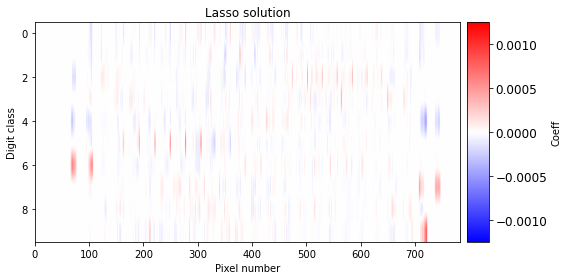

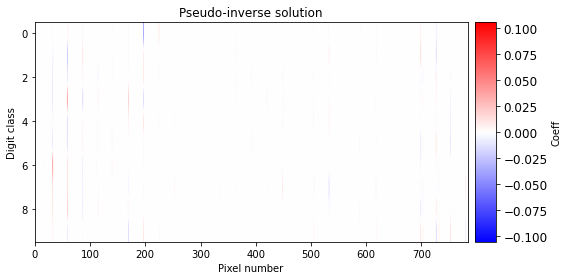

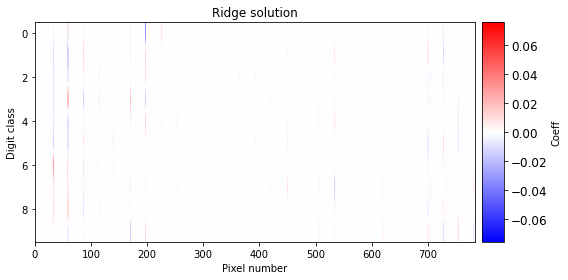

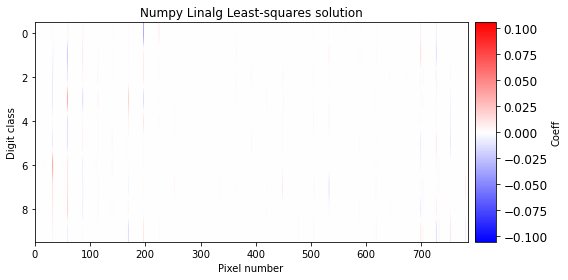

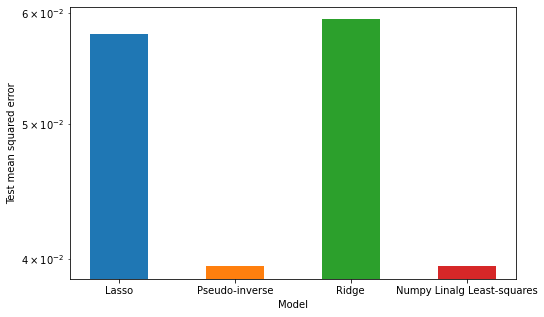

In [14]:
# 1f - visualizations

# visualize solutions from above solvers
for slvr in err_dict.keys():
    plot_mapping(err_dict[slvr]["X"], slvr)

# compare error
plot_model_error(err_dict)

Lasso alpha=1 training error: 0.060320877022422156
Lasso alpha=1 test set error: 0.0600104210906854


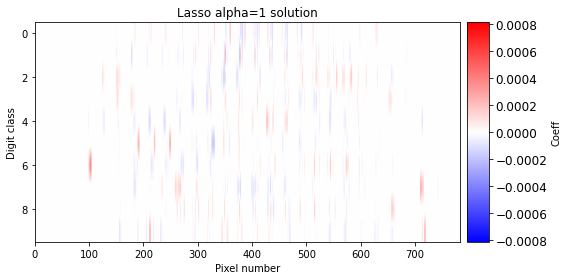

In [247]:
# 2 - promote sparsity to determine most informative mnist pixels
"""
We can promote sparsity by using the Lasso solver with a high alpha
value.
"""

# solve with lasso
alpha = 1
model_name = f"Lasso alpha={alpha}"
reg = linear_model.Lasso(alpha=alpha)
reg.fit(train_A, train_B)
X = reg.coef_.T

# look at results
train_pred = train_A @ X
train_err = metrics.mean_squared_error(train_B, train_pred)
print(f"{model_name} training error: {train_err}")

test_pred = test_A @ X
test_err = metrics.mean_squared_error(test_B, test_pred)
print(f"{model_name} test set error: {test_err}")

err_dict[model_name] = {
    "train_err": train_err,
    "test_err": test_err,
    "X": np.array(X)
}

plot_mapping(X, model_name)

In [262]:
# 3a - rank informative pixels
"""
Approach:
- sort pixels based on coefficients in sparse mapping
- visualize highest N% of "important" pixels with imshow
- mask the remaining pixels and perform test data classification
- compare error from masked test data to unmasked for different values of N
"""

# sort the sparse model based on coeffs
model_name = f"Lasso alpha={alpha}"
X_abs = np.abs(err_dict[model_name]["X"])
X_idx = np.unravel_index(np.argsort(X_abs, axis=None), X_abs.shape)

# analyze different percentages of top pixels
pct_arr = [0.025, 0.05, 0.1, 0.5, 1, 5, 25]
mask_dict = dict()
for pct in pct_arr:
    
    # visualize top pct% of coeffs
    n = int((pct / 100.) * X.size)
    
    # get indices of top coeffs in pixel space
    top_pixels = np.unravel_index(X_idx[0][-n:], train_X[0].shape)
    
    # create masks
    pixel_mask = np.zeros_like(train_X[0])
    pixel_mask[top_pixels[0], top_pixels[1]] = 1
    
    X_mask = np.zeros_like(X)
    X_mask[X_idx[0][-n:], X_idx[1][-n:]] = 1
    
    # apply mask and perform test classification
    masked_X = np.array(X) * X_mask
    test_pred = test_A @ masked_X
    test_err = metrics.mean_squared_error(test_B, test_pred)
    print(f"{model_name} {pct}% top pixels test error: {test_err}")
    
    # store it
    mask_dict[pct] = {
        "n": n,
        "pixel_mask": pixel_mask,
        "X_mask": X_mask,
        "test_err": test_err,
        "test_pred": test_pred
    }

Lasso alpha=1 0.025% top pixels test error: 0.09949330906245141
Lasso alpha=1 0.05% top pixels test error: 0.09890089474904107
Lasso alpha=1 0.1% top pixels test error: 0.09591367607301719
Lasso alpha=1 0.5% top pixels test error: 0.08323309670475229
Lasso alpha=1 1% top pixels test error: 0.07721548924649849
Lasso alpha=1 5% top pixels test error: 0.06333525376713282
Lasso alpha=1 25% top pixels test error: 0.0600104210906854


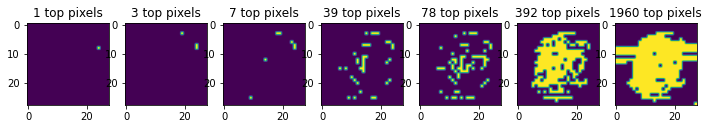

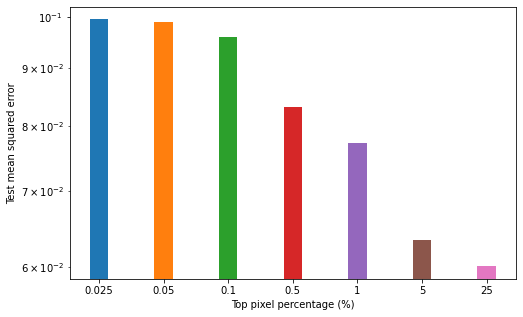

In [294]:
# 3b - compare results
"""
Here we visualize the most important pixels across the whole dataset
in pixel space. Their shape is interesting, we see they are clustered
around the central area where digits are drawn, as expected. Interestingly,
once we exceed the number of pixels identified via the original sparse
model, the remaining pixels get tiled in from less important locations.

We also visualize the mean squared error for the test dataset using
different percentages of pixels by masking their coefficients in the 
model. The result is a decreasing error as we add pixels, as expected.
"""

# visualize pixel masks
fig, axes = plt.subplots(nrows=1, ncols=len(mask_dict), figsize=(12,5))

i = 0
for pct in mask_dict.keys():
    
    pixel_mask = mask_dict[pct]["pixel_mask"]
    n = mask_dict[pct]["n"]
    
    # display mask
    axes[i].imshow(pixel_mask)
    axes[i].set_title(f"{n} top pixels")
    i += 1

# compare error with different values
plot_model_error(mask_dict, x_label="Top pixel percentage (%)")

In [286]:
def get_masks_and_err(i, pct, X, X_idx, train_X, test_B):
    
    # visualize top pct% of coeffs
    n = int((pct / 100.) * X.size)
    
    # get indices of top coeffs in pixel space
    top_pixels = np.unravel_index(X_idx[-n:], train_X[0].shape)
    
    # create masks
    pixel_mask = np.zeros_like(train_X[0])
    pixel_mask[top_pixels[0], top_pixels[1]] = 1
    
    X_mask = np.zeros_like(X)
    X_mask[X_idx[-n:], i] = 1
    
    # apply mask and perform test classification
    masked_X = np.array(X) * X_mask
    test_pred = test_A @ masked_X
    test_err = metrics.mean_squared_error(test_B, test_pred)
    
    return {
        "n": n,
        "pixel_mask": pixel_mask,
        "X_mask": X_mask,
        "test_err": test_err,
        "test_pred": test_pred
    }

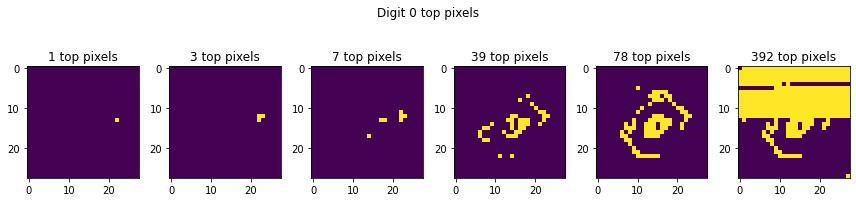

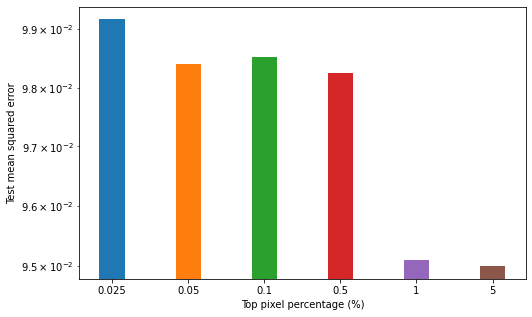

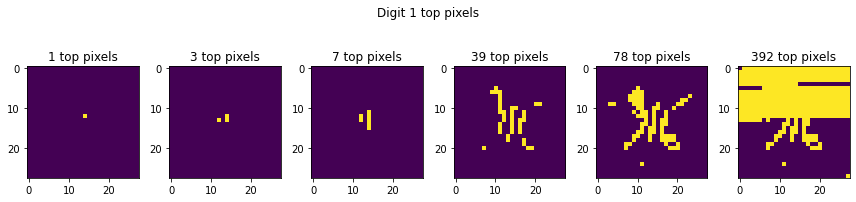

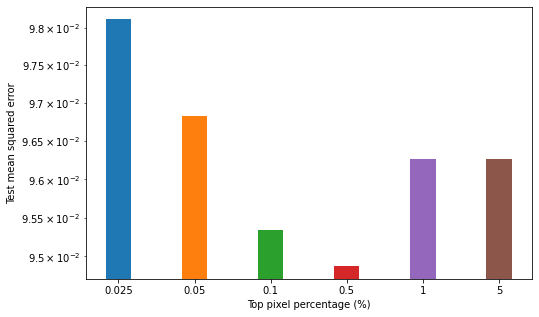

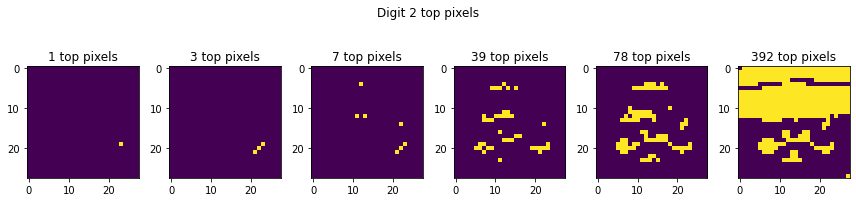

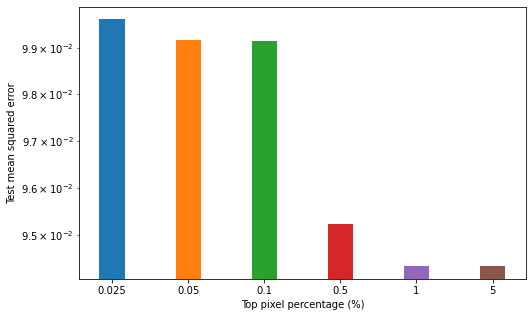

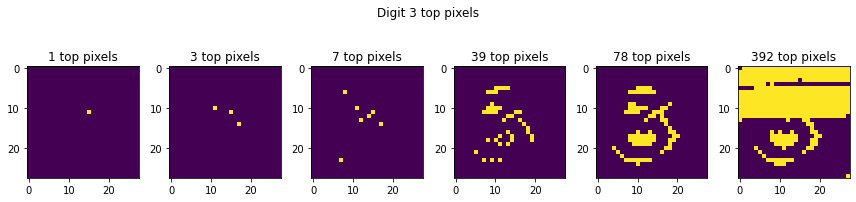

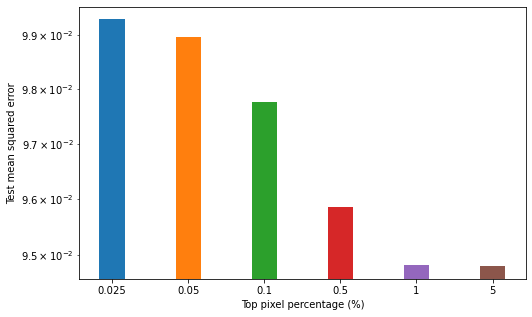

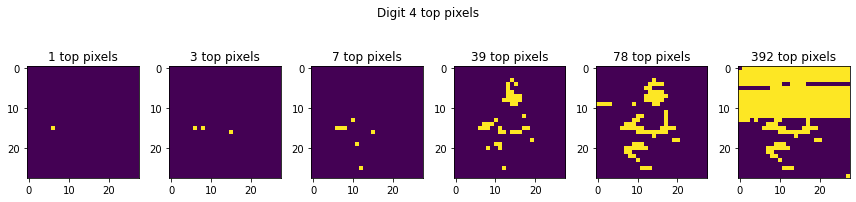

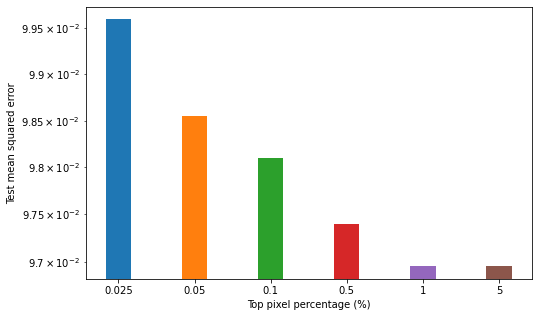

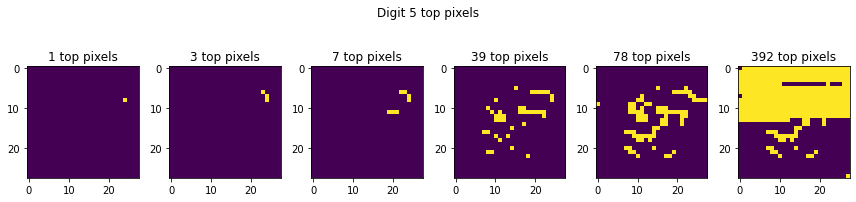

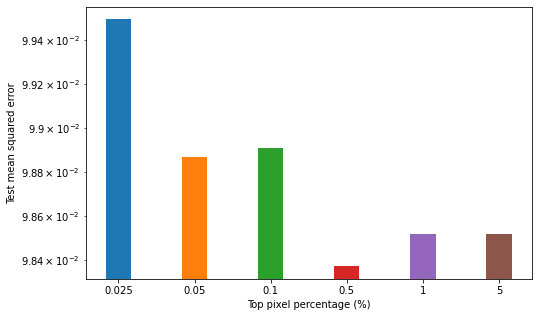

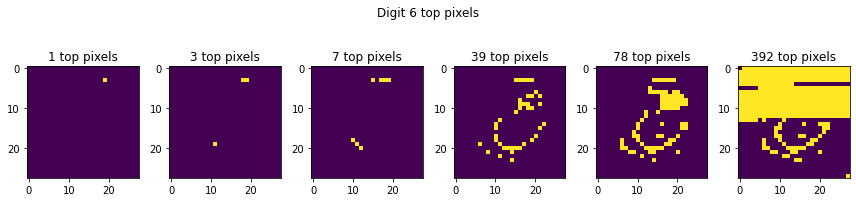

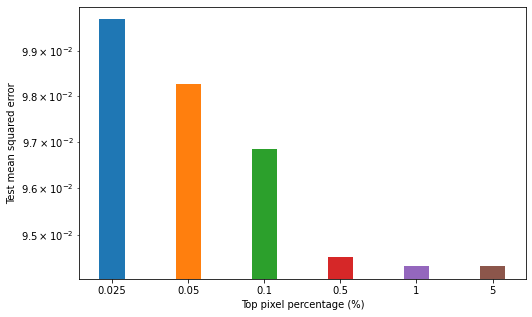

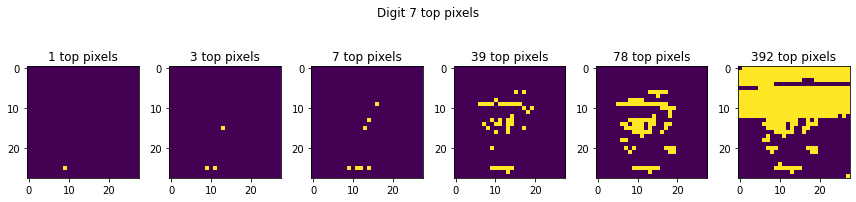

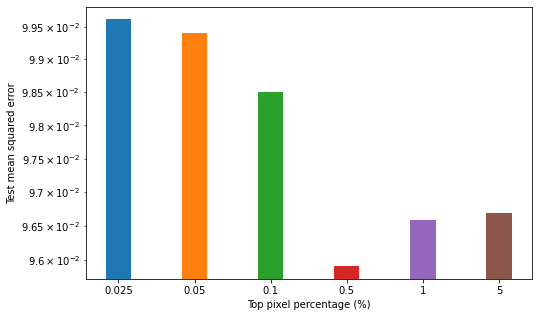

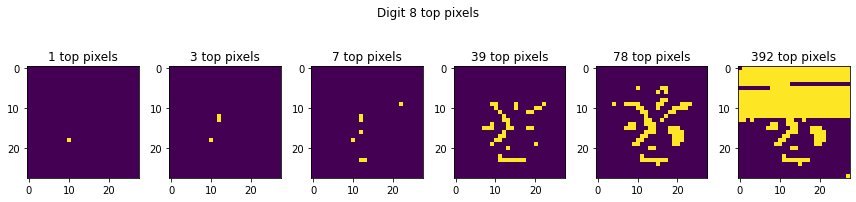

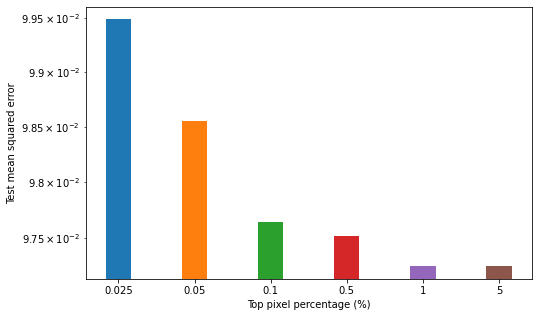

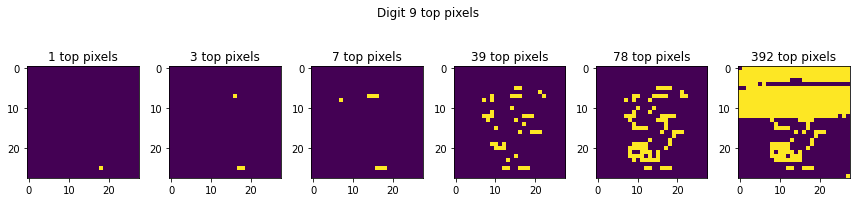

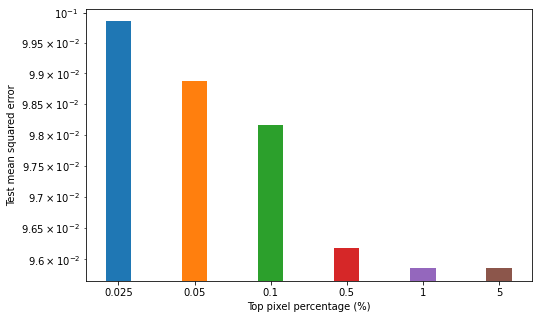

In [295]:
# 4 - Redo analysis for each digit separately
"""
When we perform the analysis on sparse model columns corresponding
to just 1 digit at a time, we see a similar trend in terms of the 
error, but we also see structure start to emerge that resembles the
digit when we plot the top pixels in pixel space.
"""

model_name = f"Lasso alpha={alpha}"
mask_dict_i = dict()
pct_arr = [0.025, 0.05, 0.1, 0.5, 1, 5]
for i in range(10):
    
    # sort the sparse model based on coeffs
    X_abs = np.abs(err_dict[model_name]["X"][:,i])
    X_idx = np.argsort(X_abs, axis=None)
    mask_dict_i[i] = dict()
    
    # try different percentages of top pixels in each digit
    for pct in pct_arr:
        mask_dict_i[i][pct] = get_masks_and_err(i, pct, X, X_idx, train_X, test_B)
        
    # visualize pixel masks
    fig, axes = plt.subplots(nrows=1, ncols=len(mask_dict_i[i]), figsize=(12,3))

    j = 0
    for pct in mask_dict_i[i].keys():

        pixel_mask = mask_dict_i[i][pct]["pixel_mask"]
        n = mask_dict_i[i][pct]["n"]

        # display mask
        axes[j].imshow(pixel_mask)
        axes[j].set_title(f"{n} top pixels")
        fig.suptitle(f"Digit {i} top pixels")
        plt.tight_layout()
        j += 1

    # compare error with different values
    plot_model_error(mask_dict_i[i], "Top pixel percentage (%)")

In [299]:
# 5 - Interpretation
"""
My thoughts are spread across comments throughout this notebook, but
to conclude:
- We've trained a number of linear classifiers on a nonlinear dataset.
- We observed that by looking at the structure of sparse models trained
    on that dataset, we can extract information about its statistics, 
    including important pixels for each classification. I believe the pixels
    that exhibit the highest variance across classes would correspond to
    those identified here as being the most important to the sparse
    model.
- It would be interesting to compare the structure identified here with
    what's identified by models that include nonlinearity, like CNNs.
"""
course = "Done"